In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# load and clean data
df = pd.read_csv('student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [3]:
df = df.rename(columns={
    "Well versed with the subject": "well_versed_subject",
    "Explains concepts in an understandable way": "explains_concepts",
    "Use of presentations": "use_presentations",
    "Degree of difficulty of assignments": "assignment_difficulty",
    "Solves doubts willingly": "solves_doubts",
    "Structuring of the course": "course_structure",
    "Provides support for students going above and beyond": "support_students",
    "Course recommendation based on relevance": "recommendation_score"
})
df.head()

,Unnamed: 0,Student ID,well_versed_subject,explains_concepts,use_presentations,assignment_difficulty,solves_doubts,course_structure,support_students,recommendation_score
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'well_versed_subject', 'explains_concepts',
       'use_presentations', 'assignment_difficulty', 'solves_doubts',
       'course_structure', 'support_students', 'recommendation_score'],
      dtype='object')

In [5]:
 df = df.drop(columns=["Unnamed: 0"])
 df.head()

,Student ID,well_versed_subject,explains_concepts,use_presentations,assignment_difficulty,solves_doubts,course_structure,support_students,recommendation_score
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [6]:
df.shape

(1001, 9)

In [7]:
# Summary Statistics
df.describe()

,Student ID,well_versed_subject,explains_concepts,use_presentations,assignment_difficulty,solves_doubts,course_structure,support_students,recommendation_score
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df.isnull().sum()

,0
Student ID,0
well_versed_subject,0
explains_concepts,0
use_presentations,0
assignment_difficulty,0
solves_doubts,0
course_structure,0
support_students,0
recommendation_score,0


In [9]:
# Satisfaction Classification
def categorize_satisfaction(score):
  if score >= 7:
    return 'High'
  elif score >= 4:
    return 'Medium'
  else:
    return 'Low'
df['satisfaction_level'] = df['recommendation_score'].apply(categorize_satisfaction)
df.head()

,Student ID,well_versed_subject,explains_concepts,use_presentations,assignment_difficulty,solves_doubts,course_structure,support_students,recommendation_score,satisfaction_level
0,340,5,2,7,6,9,2,1,8,High
1,253,6,5,8,6,2,1,2,9,High
2,680,7,7,6,5,4,2,3,1,Low
3,806,9,6,7,1,5,9,4,6,Medium
4,632,8,10,8,4,6,6,9,9,High


In [10]:
# Count how many students fall into each satisfaction level
satisfaction_counts = df["satisfaction_level"].value_counts()
satisfaction_counts
# Calculate percentages
satisfaction_percentages = df["satisfaction_level"].value_counts(normalize=True) * 100
satisfaction_percentages.round(2)
# combine into one DataFrame for a clean summary table
satisfaction_summary = pd.DataFrame({
    "Count": satisfaction_counts,
    "Percentage": satisfaction_percentages.round(2)
})
satisfaction_summary

,Count,Percentage
satisfaction_level,,
High,419,41.86
Medium,297,29.67
Low,285,28.47


Overall, 41.9% of students reported high satisfaction, while the remaining 58.1% expressed medium or low satisfaction, indicating a need for improvements to enhance overall course experiences.

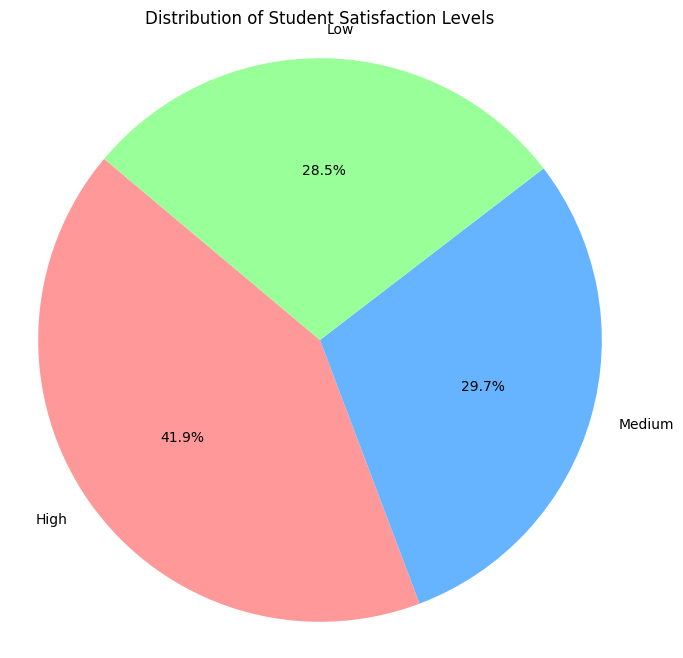

In [11]:
# Visualization: Satisfaction Levels
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_summary['Count'], labels=satisfaction_summary.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Student Satisfaction Levels')
plt.axis('equal')
plt.show()

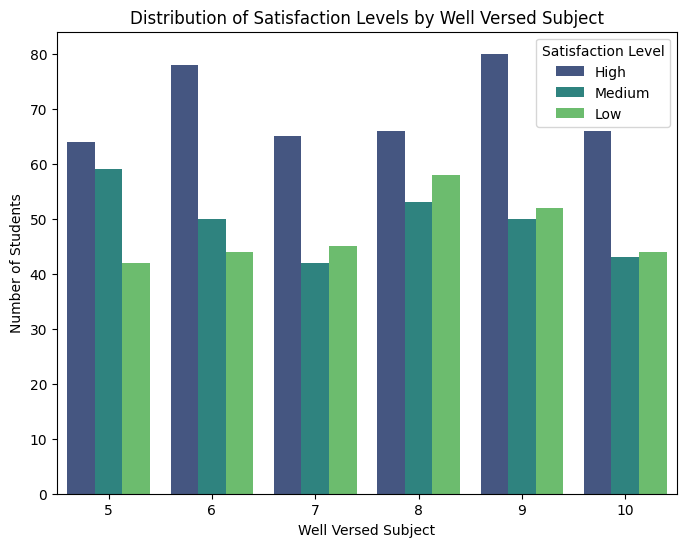

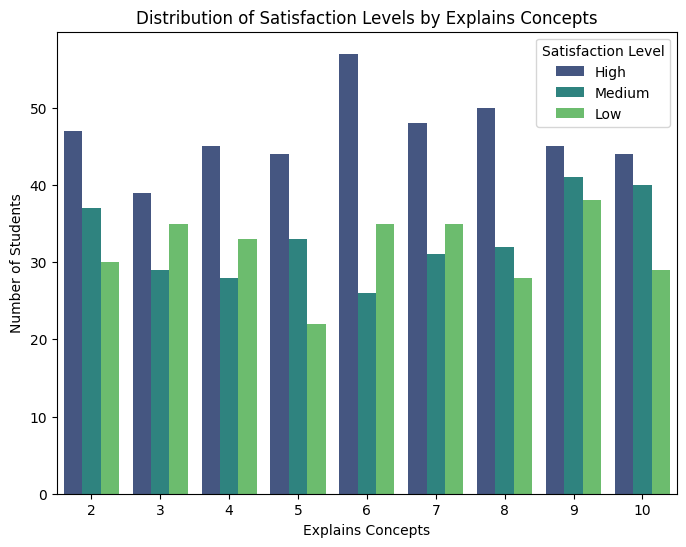

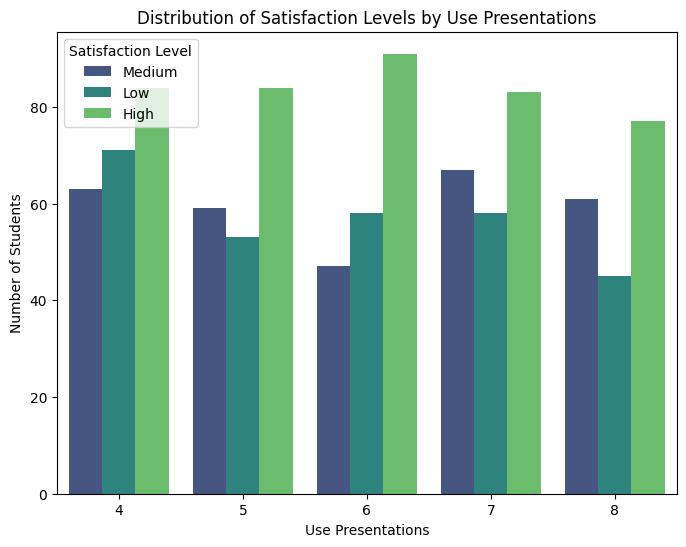

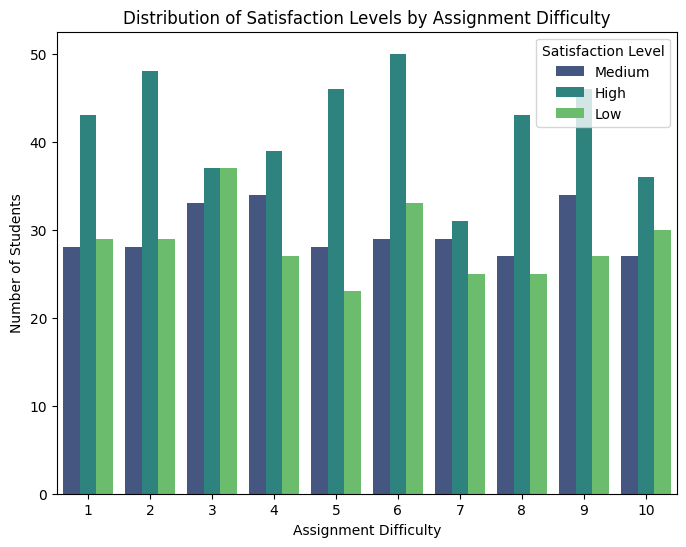

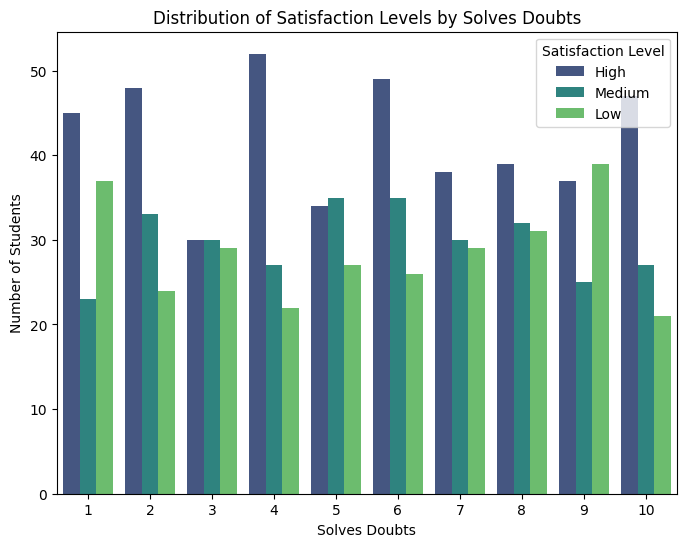

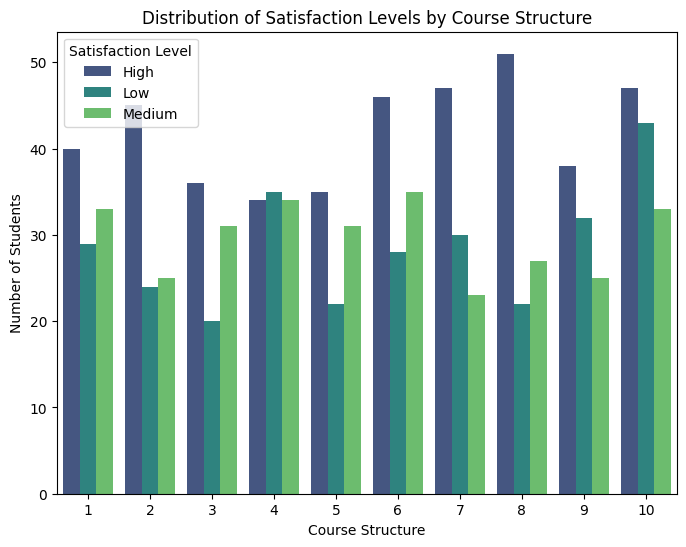

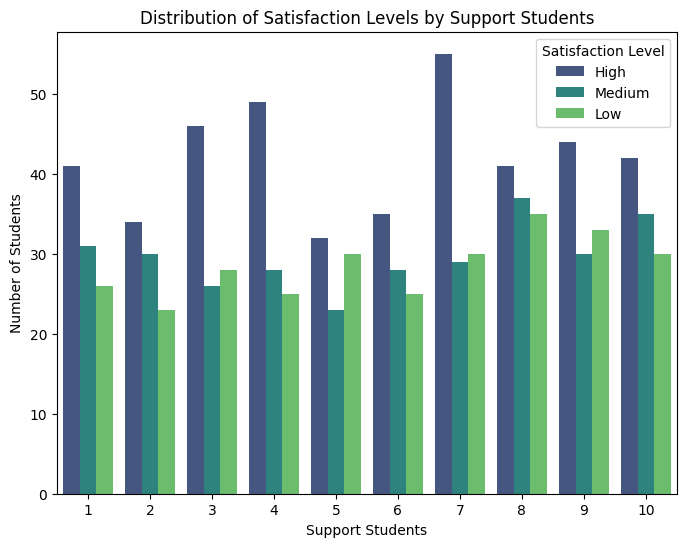

In [12]:
# Visualization by Indicators
indicators = ['well_versed_subject', 'explains_concepts', 'use_presentations', 'assignment_difficulty', 'solves_doubts', 'course_structure', 'support_students']

for indicator in indicators:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=indicator, hue='satisfaction_level', palette='viridis')
    plt.title(f'Distribution of Satisfaction Levels by {indicator.replace("_", " ").title()}')
    plt.xlabel(indicator.replace("_", " ").title())
    plt.ylabel('Number of Students')
    plt.legend(title='Satisfaction Level')
    plt.show()

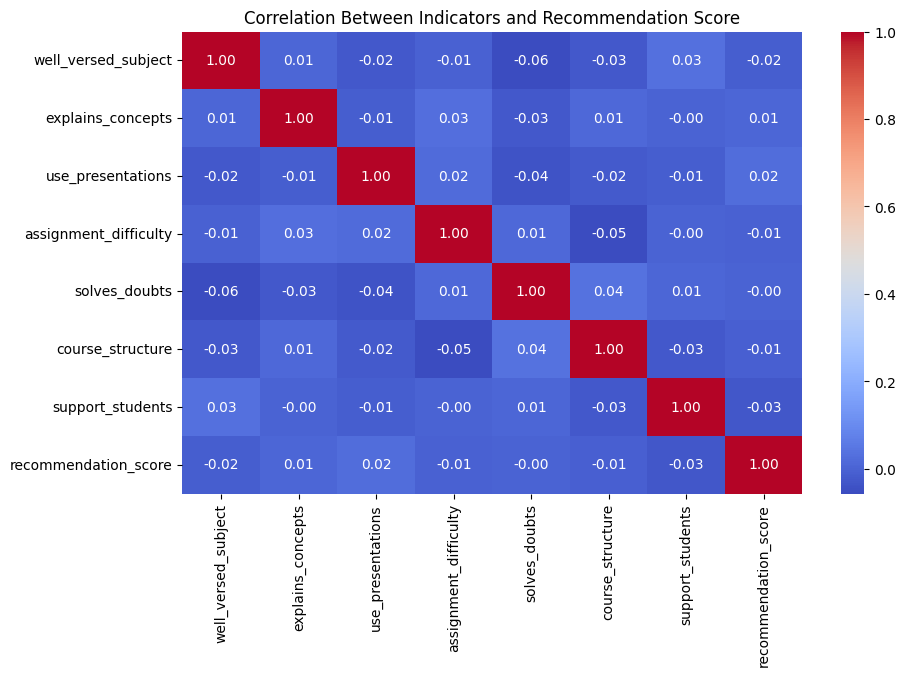

In [13]:
# Correlation heatmap of all indicators with recommendation_score
plt.figure(figsize=(10, 6))
sns.heatmap(df[indicators + ['recommendation_score']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Indicators and Recommendation Score")
plt.show()

The correlation heatmap shows very weak relationships between individual indicators and the recommendation score (all near 0). This means overall satisfaction is not driven by a single factor but likely by a combination of aspects or external influences.

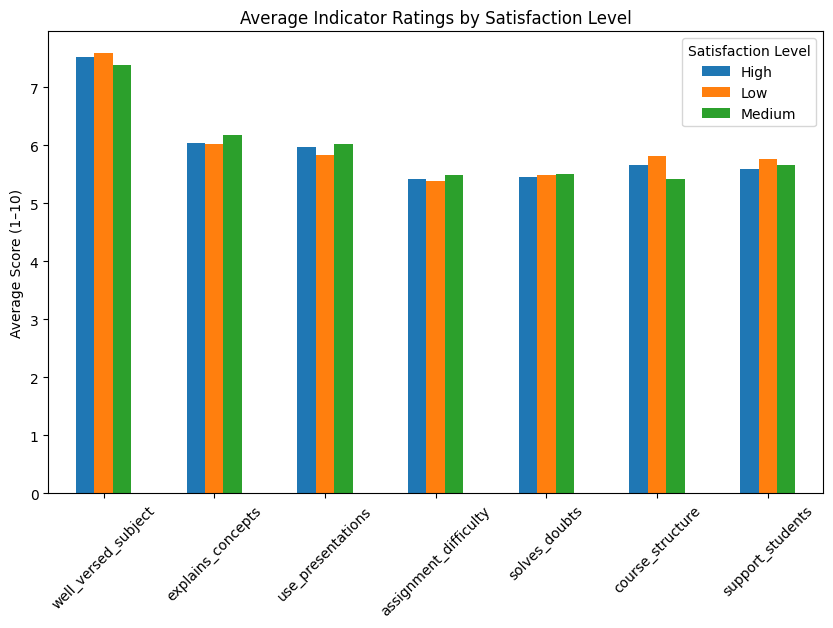

In [14]:
# Average score of each indicator grouped by satisfaction level
indicator_means = df.groupby("satisfaction_level")[indicators].mean()

indicator_means

# Bar chart for comparison
indicator_means.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Indicator Ratings by Satisfaction Level")
plt.ylabel("Average Score (1–10)")
plt.xticks(rotation=45)
plt.legend(title="Satisfaction Level")
plt.show()

In [15]:
# Sentiment Analysis (Using Satisfaction Level)
# Map satisfaction levels to sentiment polarity
sentiment_map = {
    "High": "Positive",
    "Medium": "Neutral",
    "Low": "Negative"
}

df["sentiment"] = df["satisfaction_level"].map(sentiment_map)

# Count distribution of sentiments
sentiment_counts = df["sentiment"].value_counts()
"Sentiment distribution:"
sentiment_counts

,count
sentiment,
Positive,419
Neutral,297
Negative,285


/tmp/ipython-input-3712775612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


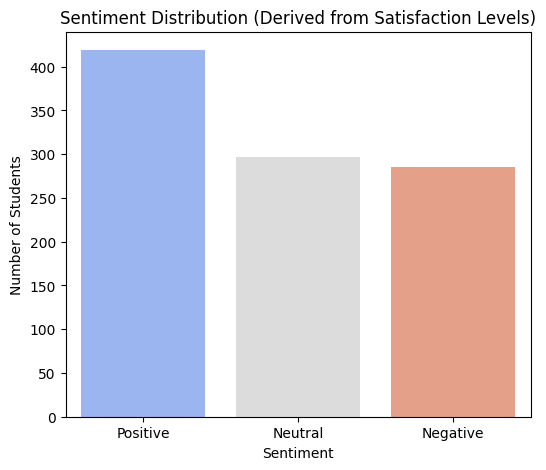

In [16]:
# Bar chart of sentiment distribution
plt.figure(figsize=(6,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution (Derived from Satisfaction Levels)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Students")
plt.show()

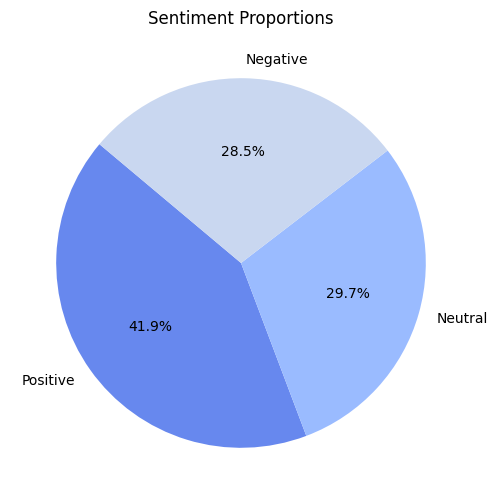

In [17]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Sentiment Proportions")
plt.show()

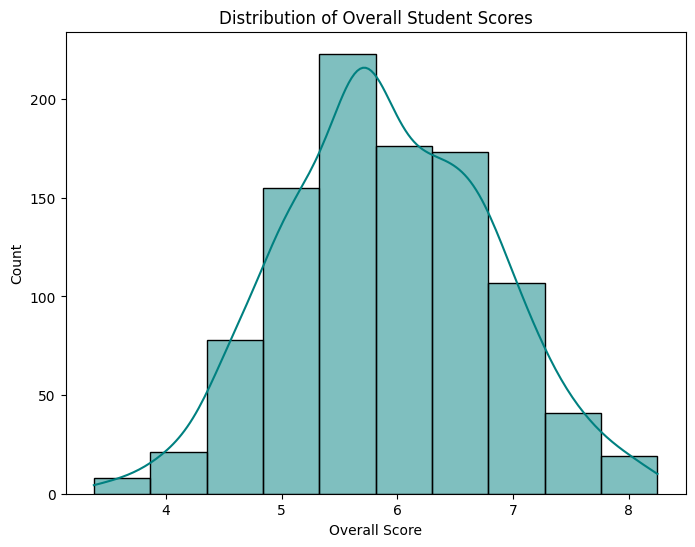


Top 5 Happiest Students:
     Student ID  well_versed_subject  explains_concepts  use_presentations  \
199         770                   10                 10                  5   
110         188                    7                  6                  8   
692         238                    8                  7                  5   
580          78                   10                  9                  6   
658         269                    9                 10                  6   

     assignment_difficulty  solves_doubts  course_structure  support_students  \
199                      7             10                 7                 7   
110                      9              9                 8                 9   
692                     10             10                 9                 7   
580                      8             10                 7                 7   
658                     10             10                 1                 9   

     recommendatio

In [18]:
df["overall_score"] = df[indicators + ["recommendation_score"]].mean(axis=1)

plt.figure(figsize=(8,6))
sns.histplot(df["overall_score"], bins=10, kde=True, color="teal")
plt.title("Distribution of Overall Student Scores")
plt.xlabel("Overall Score")
plt.show()

print("\nTop 5 Happiest Students:")
print(df.sort_values("overall_score", ascending=False).head())

print("\nBottom 5 Least Satisfied Students:")
print(df.sort_values("overall_score").head())